# Verifying the Li-Stephens Model inference of the jump rate

This notebook explores a verification of our Li-Stephens Model implementation. Specifically we focus on: (1) estimation of the haplotype copying jump rate when the error rate is given and (2) joint estimation of the jump-rate and the error probability via numerical approximation.

For the joint estimation of the jump-rate and the error probability we are able to obtain the standard errors of each estimate as well by taking the square root of the diagonal of the Hessian matrix. In the case of the marginal jump rate estimation the error probability was fixed at $\epsilon = 10^{-2}$.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['pdf.fonttype'] = 3

import sys
sys.path.append('../../src/')
from plot_utils import *

%matplotlib inline

In [2]:
# Reading in the CSV of results from our various simulations ... 
results_csv = '../../results/ls_verify/ls_simulations_100.csv'
ls_verify_df = pd.read_csv(results_csv)
ls_verify_df.head()

,scales_true,scales_marg_hat,scales_jt_hat,eps_jt_hat,se_scales_jt_hat,se_eps_jt_hat
0,100,102.516313,102.674217,0.019105,24.716874,0.000066
1,200,189.369557,189.650502,0.019182,39.912196,0.000100
2,300,292.669794,293.056054,0.019423,47.277726,0.000085
3,400,417.647663,417.991549,0.019413,40.383416,0.000066
4,500,503.451364,504.012475,0.020576,45.715850,0.000129


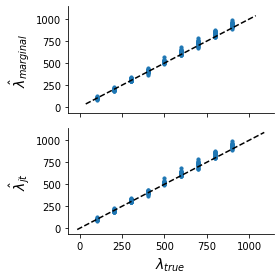

In [3]:
fig, ax = plt.subplots(2,1,figsize=(4,4), sharex=True, sharey=True)
ax[0].scatter(ls_verify_df['scales_true'].values, 
           ls_verify_df['scales_marg_hat'].values, s=10);

ax[1].scatter(ls_verify_df['scales_true'].values, 
           ls_verify_df['scales_jt_hat'].values, s=10);

plot_yx(ax[0], linestyle='--', color='black')
plot_yx(ax[1], linestyle='--', color='black')


ax[1].set_xlabel(r'$\lambda_{true}$', fontsize=14);
ax[1].set_ylabel(r'$\hat{\lambda}_{jt}$', fontsize=14);
ax[0].set_ylabel(r'$\hat{\lambda}_{marginal}$', fontsize=14);

debox(ax[0]); debox(ax[1]);
fig.tight_layout();

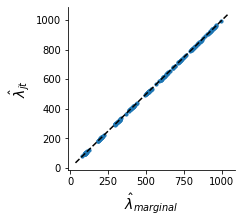

In [4]:
fig, ax = plt.subplots(1,1,figsize=(3,3))
ax.scatter(ls_verify_df['scales_marg_hat'], 
           ls_verify_df['scales_jt_hat'], s=10)

debox(ax); 
plot_yx(ax, color='black', linestyle='--');
ax.set_ylabel(r'$\hat{\lambda}_{jt}$', fontsize=14);
ax.set_xlabel(r'$\hat{\lambda}_{marginal}$', fontsize=14);

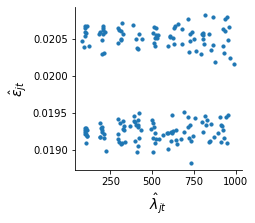

In [5]:
fig, ax = plt.subplots(1,1,figsize=(3,3))
ax.scatter(ls_verify_df['scales_jt_hat'], 
           ls_verify_df['eps_jt_hat'], s=10)

debox(ax); 
# plot_yx(ax, color='black', linestyle='--');
ax.set_xlabel(r'$\hat{\lambda}_{jt}$', fontsize=14);
ax.set_ylabel(r'$\hat{\epsilon}_{jt}$', fontsize=14);

# Plotting with thinned SNP data to explore effect of fewer SNPs on estimation

The goal with this data is so that even with subsampling of SNPs that we can be assured that we 
are able to reliably estimate the copying jump-rate. Here we have pushed the extremes from sampling every 5th snp to every 1000th snp. 

The intuition should be that as genetic markers get farther apart, it is increasingly hard to observe short-range haplotype switches (which may lead to a downward bias when the true jump rate is high). 

In [46]:
results_csv2 = '../../results/ls_verify/ls_simulations_100_thinned.csv'
ls_verify2_df = pd.read_csv(results_csv2)
ls_verify2_df.head()

,scales_true,scales_marg_hat,scales_jt_hat,eps_jt_hat,se_scales_jt_hat,se_eps_jt_hat,nsnps,seeds,replicate,min_gen_dist
0,100,78.436509,79.114917,0.020295,56.023290,0.000562,24847,1,0,1.022978e-08
1,200,200.396657,200.813655,0.020134,32.436453,0.000287,24847,1,0,1.022978e-08
2,300,327.192948,327.526224,0.019617,27.081933,0.000203,24847,1,0,1.022978e-08
3,400,382.972537,383.474213,0.020997,30.080434,0.000266,24847,1,0,1.022978e-08
4,500,493.376442,493.782357,0.019530,28.219369,0.000200,24847,1,0,1.022978e-08


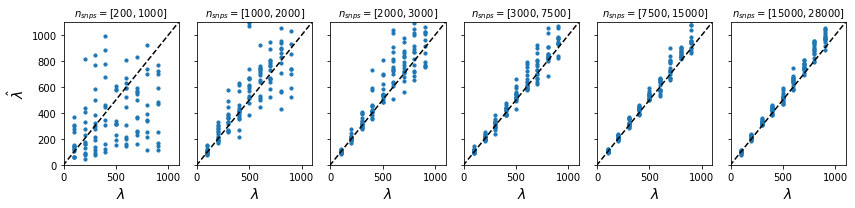

In [59]:
fig, ax = plt.subplots(1,6,figsize=(12,3), sharex=True, sharey=True)
nsnps_unique = np.unique(ls_verify2_df.nsnps)
windows = [200,1000, 2000, 3000, 7500, 15000, 28000]

for i in range(1,len(windows)):
    idx = (ls_verify2_df['nsnps'] < windows[i]) & (ls_verify2_df['nsnps'] > windows[i-1])
    x = ls_verify2_df['scales_true'][idx]
    y = ls_verify2_df['scales_jt_hat'][idx]
    yerr= ls_verify2_df['se_scales_jt_hat'][idx]
    ax[i-1].scatter(x,y, s=10)
    plot_yx(ax[i-1], linestyle='--', color='black')
    ax[i-1].set_title(r'$n_{snps}=[%d,%d]$' % (windows[i-1], windows[i]), fontsize=10)
    ax[i-1].set_xlabel(r'$\lambda$', fontsize=14)

ax[0].set_ylabel(r'$\hat{\lambda}$', fontsize=14)

ax[0].set_ylim(0,1100)
ax[0].set_xlim(0,1100)
plt.tight_layout()